In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yoda
yoda.__file__

'/cvmfs/atlas.cern.ch/repo/sw/software/23.6/sw/lcg/releases/MCGenerators/yoda/1.9.8-38789/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/yoda/__init__.py'

In [13]:
root_path = '/sdf/group/ldmx/users/dongyi/data/'
Event = '/Events/run_01'
DATA='/CMS_2018_I1620050'
figure_pre = '/HEPData-ins1620050-v1-Table_'
table_type=['lepton pT', 'jet pT', 'top pT', 'top y', r'$p_T^{t\bar{t}}$', r'$y^{t\bar{t}}$', r'$M^{t\bar{t}}$', r'$\Delta\phi^{t\bar{t}}$']
xtitle=[r'$p_T^{lep}$[GeV]', r'$p_T^{jet}$[GeV]', r'$p_T^{top}$[GeV]', r'$y^{top}$', r'$p_T^{t\bar{t}}$[GeV]', r'$y^{t\bar{t}}$', r'$M^{t\bar{t}}$[GeV]', r'$\Delta\phi^{t\bar{t}}$']
figure_type=['4a', '4b', '4c', '4d', '6a', '6b'] # 4a, b, c, d, are pT>20, 40, 60, 80; 6a, b are leading b jet and sub leading b jet
figure_no = ['/d01-x01-y01', '/d02-x01-y01', '/d03-x01-y01', '/d04-x01-y01', '/d05-x01-y01', '/d06-x01-y01', '/d07-x01-y01', '/d08-x01-y01']
MC_yoda=['NLO_5m_DATA', 'NLO_DELTA_5m_DATA']
yoda_suff = '.yoda'
title = 'Normalized differential cross-section vs ' 
plot_name = ['lep_pT', 'jet_pT', 'top_pT', 'top_y', 'ttbar_pT', 'ttbar_y', 'ttbar_m', 'ttbar_phi']

#plot_path = root_path + 'NLO_1k' + Event + '/python-plots' + DATA + '/' + plot_name[0] + '.png'
plot_path = root_path + 'JO_plots/NLO_5m' + DATA + '/' + plot_name[0] + '.png'
NLO_file  = root_path+'BATCH'+'/NLO_5m_ATLAS_CMS'+yoda_suff
print(NLO_file)
print(plot_path)

/sdf/group/ldmx/users/dongyi/data/BATCH/NLO_5m_ATLAS_CMS.yoda
/sdf/group/ldmx/users/dongyi/data/JO_plots/NLO_5m/CMS_2018_I1620050/lep_pT.png


In [16]:
def plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path, xtitle):
    xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
    fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]}, figsize=(10,8))
    fig.subplots_adjust(hspace=0)
    axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=data_xerr, yerr=NLO_yerr, label='NLO_5m')
    axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=data_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
    axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=data_xerr, yerr=data_yerr, label='DATA')
    axs[0].legend()
    axs[0].set_xlim(min(xEdges), max(xEdges))
    axs[0].set_yscale('log')
    axs[0].set_title(title)
    
    axs[1].stairs(NLO_5m/datay, xEdges, color='red')
    axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
    axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
    axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(data_yerr/datay,0),np.ones(len(xEdges))-np.append(data_yerr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
    axs[1].set_ylabel('MC/DATA', fontsize=6)
    axs[1].set_ylim(0.8, 1.2)
    axs[1].legend(bbox_to_anchor=(.99, 1.05))


    axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
    axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
    axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
    axs[2].set_ylabel('DELTA/NLO', fontsize=6)
    axs[2].set_xlabel(xtitle)
    axs[2].legend(bbox_to_anchor=(.99, 1.05))
    axs[2].set_ylim(0.9, 1.1)

    fig.savefig(plot_path, bbox_inches='tight', dpi=200)


/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_1.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_2.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_3.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_4.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_5.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_6.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_7.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/CMS_2018_I1620050/HEPData-ins1620050-v1-Table_8.yoda


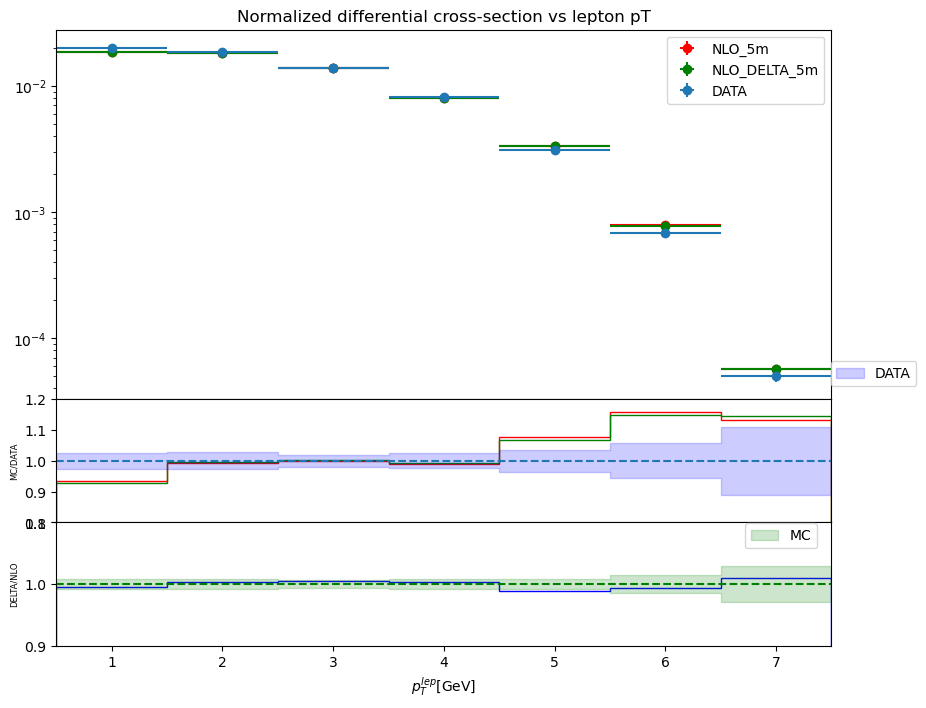

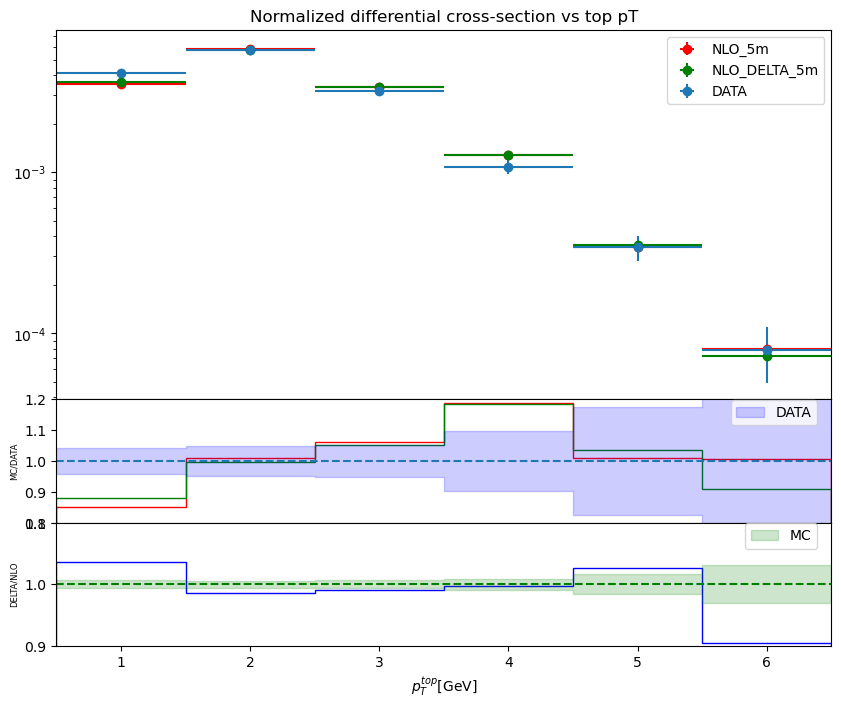

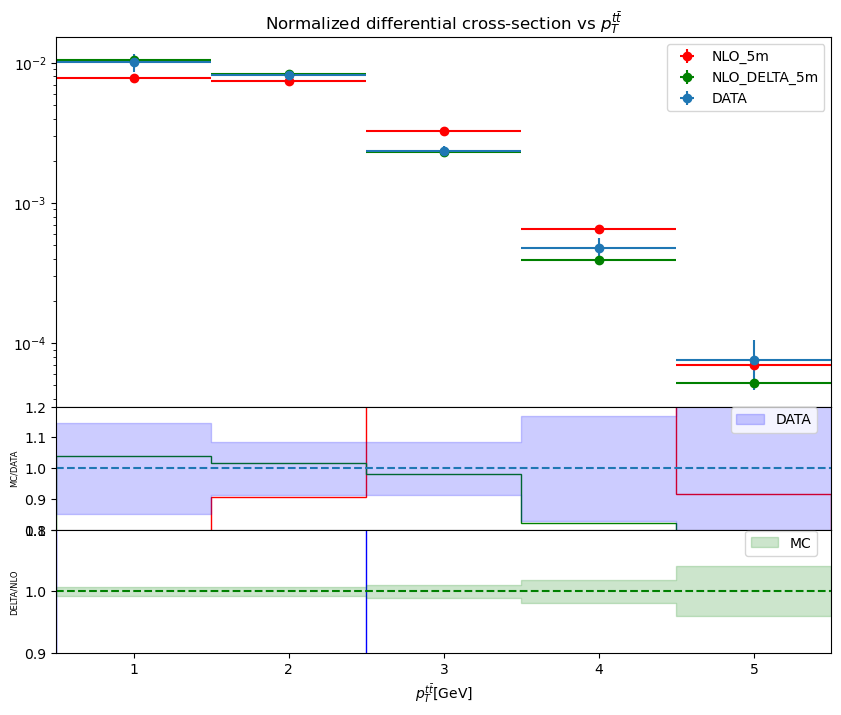

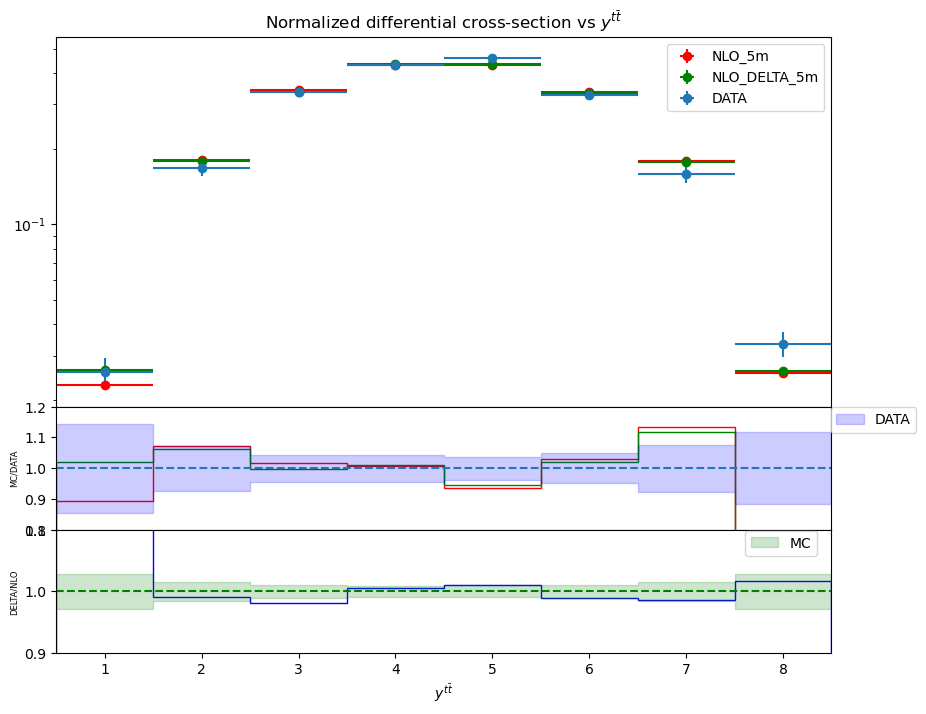

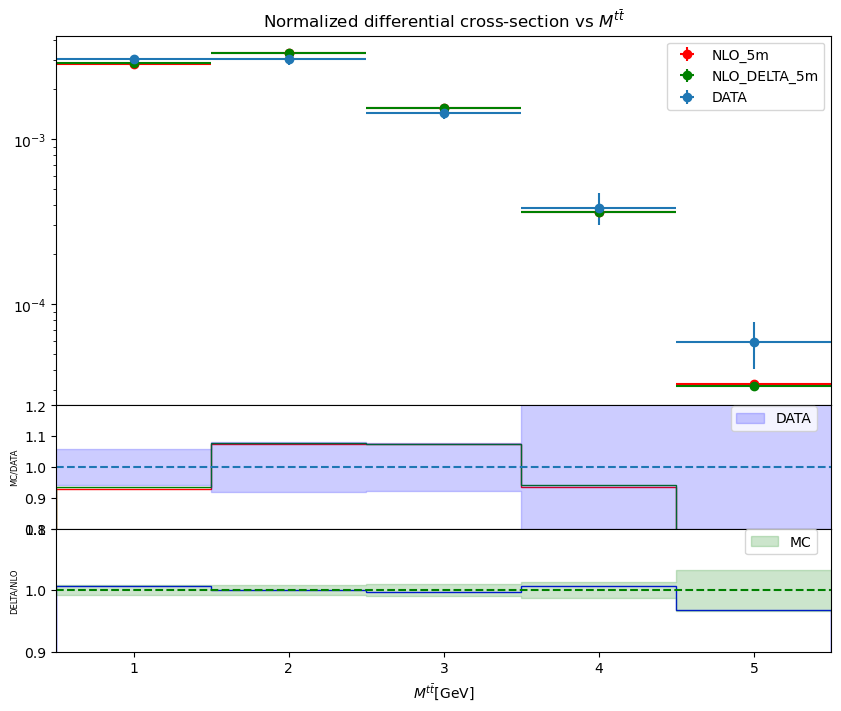

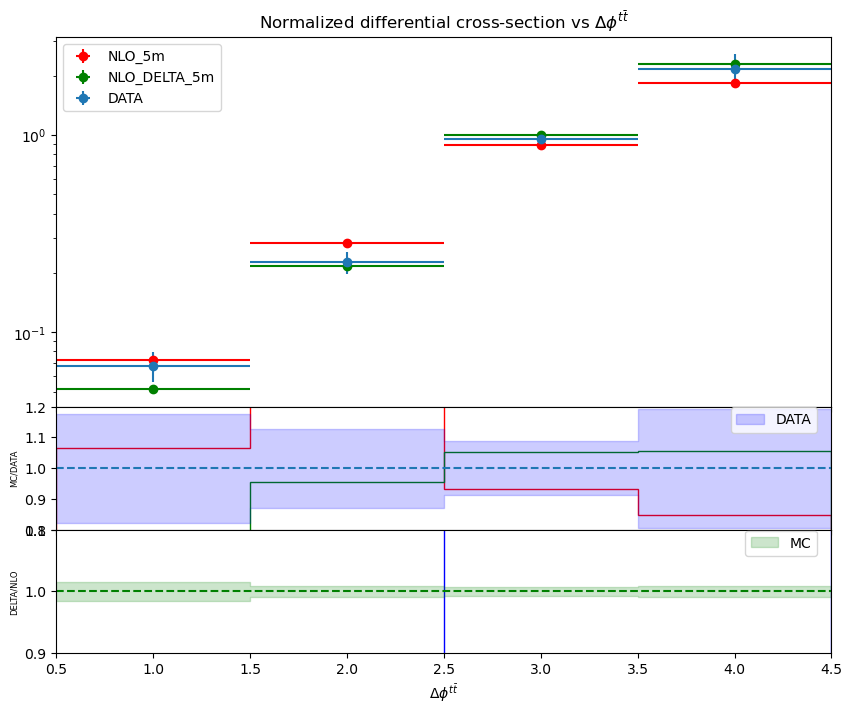

In [18]:
for i in range(len(table_type)):
    index = (i+1)
    DATA_file = root_path + 'NLO_1k' + Event + DATA + figure_pre + '%d'%index + yoda_suff
    print(DATA_file)
    NLO_file   = root_path+'NLO_5m'+Event+'/NLO_5m_ATLAS_CMS'+yoda_suff # local event gen madspin is not the same as AthGen
    DELTA_file = root_path+'NLO_DELTA_5m'+Event+'/NLO_DELTA_5m_ATLAS_CMS'+yoda_suff 
    #NLO_file  = root_path+'BATCH'+'/NLO_5m_ATLAS_CMS'+yoda_suff # JO data including madspin
    #DELTA_file = root_path+'BATCH'+'/NLO_DELTA_5m_ATLAS_CMS'+yoda_suff # JO data including madspin
    MC_dict = DATA + '/d' + '%02d'%index + '-x01-y01'
    DATA_dict = '/REF' + DATA +  '/d' + '%02d'%index + '-x01-y01'
    plot_path = root_path + 'NLO_1k' + Event + '/python-plots' + DATA + DATA + '_' + plot_name[i] + '.png'
    #plot_path = root_path + 'BATCH/JO_plots/' + DATA + DATA + '_' + plot_name[i] + '_JO' + '.png'
    title = 'Normalized differential cross-section vs ' + table_type[i]
    
    DATA_yoda = yoda.read(DATA_file)[DATA_dict]
    NLO = yoda.read(NLO_file)[MC_dict]
    DELTA=yoda.read(DELTA_file)[MC_dict]

    datax = DATA_yoda.xVals()
    datay = DATA_yoda.yVals()
    data_xerr = DATA_yoda.xErrs()[:,0]
    data_yerr = DATA_yoda.yErrs()[:,0]
    NLO_5m = NLO.yVals()
    NLO_yerr=NLO.yErrs()
    DELTA_5m = DELTA.yVals()
    DELTA_yerr=DELTA.yErrs()

    plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path, xtitle[i])